In [1]:
from geometry import *
import numpy as np
import pypower
import scipy.optimize as opt

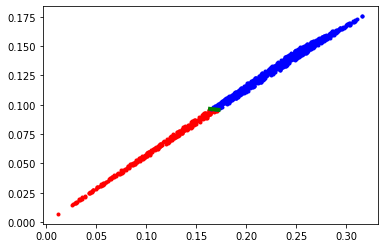

In [2]:
# check (visually) the computation of the intersection between a triangle and a quadric

import matplotlib.pyplot as plt
%matplotlib inline

# quad(x,y,z) = -x^2 - y^2 + z
# quad >= if z >= x^2 + y^2
quad = Quadric(np.diag([-1,-1,0]), np.array([0,0,1]), -1)

above = np.array([0,0,2])
v = np.random.rand(3)
w = np.random.rand(3)
    
def trisample(A, B, C,N):
    r1 = np.random.rand(N)
    r2 = np.random.rand(N)
    s1 = np.sqrt(r1)

    X = np.zeros((N,3))
    X[:,0] = A[0] * (1.0 - s1) + B[0] * (1.0 - r2) * s1 + C[0] * r2 * s1
    X[:,1] = A[1] * (1.0 - s1) + B[1] * (1.0 - r2) * s1 + C[1] * r2 * s1
    X[:,2] = A[2] * (1.0 - s1) + B[2] * (1.0 - r2) * s1 + C[2] * r2 * s1
    return X

X = trisample(above,v,w,1000)
s = np.array([quad(x) for x in X])
plt.plot(X[s>0,0], X[s>0,1],'.r')
plt.plot(X[s<0,0], X[s<0,1],'.b')

curves = intersect_triangle_with_quadric(quad, v, w, above)
for c in curves:
    plt.plot(c[:,0], c[:,1],'g', linewidth=4)


3.999720571840762


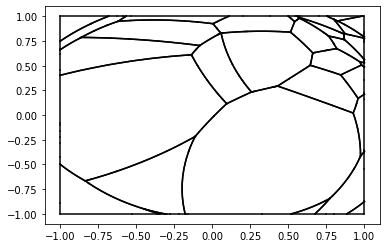

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

quad = Quadric(np.diag([-1,-1,0]), np.array([0,0,1]), 1)

N=100
X = np.random.rand(N,3)
w = np.zeros(N)
cells = pypower.power_diagram(X,w)

area = 0
for i in range(N):
    curves = intersect_cell_with_quadric(X,cells[i],quad,20)
    if curves is None:
        print("empty cell {}".format(i))
        continue
    for j,curvesj in curves.items():
        for crv in curvesj:
            crv = np.array(crv)
            for i in range(crv.shape[0]-1):
                a = crv[i,0:2]
                b = crv[i+1,0:2]
                area += np.linalg.det(np.array([a,b]))/2
            plt.plot(crv[:,0], crv[:,1], 'k')
print(area)

In [4]:
def area_of_cell(curves):
    if curves is None:
        return 0.0
    area = 0.0
    # compute area of cell i by integrating over the boundary
    # j is the number of the adjacent cell (negative number if adjacency 
    # is with the boundary)
    for j,curvesj in curves.items():
        for crv in curvesj:
            crv = np.array(crv)
            for k in range(crv.shape[0]-1):
                a = crv[k,0:2]
                b = crv[k+1,0:2]
                area += np.linalg.det(np.array([a,b]))/2
    return area

def areas_of_power_diagram_quadric_intersection(X,w,quad):
    cells = pypower.power_diagram(X,w)
    areas = [area_of_cell(intersect_cell_with_quadric(X,c,quad,20)) for c in cells]
    return np.array(areas)
 
N = 10
quad = Quadric(np.diag([-1,-1,0]), np.array([0,0,1]), 1)
X = np.random.rand(N,3)
w = np.zeros(N)
H = lambda w: areas_of_power_diagram_quadric_intersection(X,w,quad)
H(w)

array([6.59099200e-04, 6.75667834e-03, 8.80666963e-02, 6.71598334e-03,
       1.13610289e+00, 1.70533215e+00, 3.38106144e-01, 0.00000000e+00,
       2.15178209e-02, 6.91712350e-01])

In [ ]:

def enlarge(x):
    z = np.zeros(len(x)+1)
    z[1:] = x
    return z
x = opt.fsolve(lambda x: (H(enlarge(x)) - 4/N)[1:], np.zeros(N-1))
w = enlarge(x)

In [7]:
# Oliker-Prussner
N = 10
X = np.random.rand(N,3)
w = np.zeros(N)
w[0] = 5
delta = 0.01
nu = 4*np.ones(N)/N

def H(w):
    return areas_of_power_diagram_quadric_intersection(X,w,quad)
def Hi(w,i):
    cells = pypower.power_diagram(X,w)
    return area_of_cell(intersect_cell_with_quadric(X,cells[i],quad,20))
def e(i):
    x = np.zeros(N)
    x[i] = 1
    return x
    
good = False
while not good:
    good = True
    t = np.zeros(N)
    for i in range(1,N):
        if Hi(w,i) >= nu[i] - delta:
            continue
        f = lambda s: Hi(w+s*e(i),i) - nu[i]
        # cell i does not have enough mass: we need to increase w
        t[i] = opt.root_scalar(f, bracket=[0,10]).root
        good = False
    print(np.linalg.norm(H(w) - 4/N))
    w = w + t

3.794733192195405
2.718049693359848
2.1218429235343823
1.7237600477626334
1.5117090850848693
1.3065562080115658
1.1475104750328198
1.0153936205707188
0.8838578672896382
0.7688678581409883
0.6130409546666803
0.6571028330855303
0.5845477547014464
0.5273312011359679
0.47473767055174987
0.4252799435497023
0.3945894706373113
0.3547177668245599
0.333173997861859
0.30437487066016333
0.2829168406099336
0.28967397846571025
len(T) = 1 -1.6727407451095937 4.4138914434554977e-07


AssertionError: 

In [6]:
H(w)

array([0.45616742, 0.39031915, 0.39472809, 0.4       , 0.39589754,
       0.39116347, 0.3947972 , 0.39373886, 0.39225695, 0.39046929])